<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Final Project // Titanic - Machine Learning from Disaster</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Final Project: Titanic - Machine Learning from Disaster\
Last Updated: September 3, 2021\
Author: Resha Dirga

<h3 id="project-overview">Project Overview</h3>

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

<i><b>The objective of this project</b></i> to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

<div class="sc-pjIrY hyFRcH"><div class="markdown-converter__text--rendered"><h3>Data Overview</h3>
<h5>Data source:</h5>
<p><i>https://www.kaggle.com/c/titanic/data</i></p>
<h5>Data size:</h5>
<p>There are three files containing 25 columns. The data has been split into two groups:</p>
<ul>
<li>training set (train.csv)</li>
<li>test set (test.csv)</li>
</ul>
<p><b> The training set </b>should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use <a rel="nofollow noreferrer" href="https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/"> feature engineering </a>to create new features.</p>
<p><b>The test set </b>should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.</p>
<p>We also include <b>gender_submission.csv</b>, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.</p>
<h3>Data Dictionary</h3>
<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>
<h3>Variable Notes</h3>
<p><b>pclass</b>: A proxy for socio-economic status (SES)<br> 1st = Upper<br> 2nd = Middle<br> 3rd = Lower<br><br> <b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br><br> <b>sibsp</b>: The dataset defines family relations in this way...<br> Sibling = brother, sister, stepbrother, stepsister<br> Spouse = husband, wife (mistresses and fiancés were ignored)<br><br> <b>parch</b>: The dataset defines family relations in this way...<br> Parent = mother, father<br> Child = daughter, son, stepdaughter, stepson<br> Some children travelled only with a nanny, therefore parch=0 for them.</p></div></div>

<h3>Chapter 0: Import modules</h3>
<p>This chapter lists all modules that being used on this document. The module import process will be performed on this chapter</p>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split

import sklearn.linear_model as linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

import pickle

<h3>Chapter 1: Data Loading and Exploratory Data Analysis</h3>
<p>This chapter reads the data and provides an overview of the data, such as: the name of columns, number of values, data types within each columns. The first 5 data is also shown to get better understanding of the data.</p>
<p>This chapter preprocesses the data to get dataset that is ready for analysis. The preprocessing include:
<ul>
    <li>Drop unused columns or those that cannot be used on the statistics (e.g., all value is unique for every entry, the definition of the column is unclear, and the column values are empty)</li>
    <li>Convert data to 'ready-to-process' types, for example converting area values from string or object to integer</li>
</ul>
</p>

In [2]:
# read databases
df_titanic_train = pd.read_csv('datasets/train.csv')

print('Train dataset')
df_titanic_train.info()

Train dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<p><b>For EDA purpose only:</b>
    <ul>
        <li>Combine the test and train dataframe</li>
        <li>Remove object-type columns</li>
        <li>Take-out target column (Survived)</li>
    </ul>
</p>

In [4]:
df_eda = df_titanic_train.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_eda.dropna()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,male,22.0,1,0,7.2500
1,2,1,female,38.0,1,0,71.2833
2,3,3,female,26.0,0,0,7.9250
3,4,1,female,35.0,1,0,53.1000
4,5,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,886,3,female,39.0,0,5,29.1250
886,887,2,male,27.0,0,0,13.0000
887,888,1,female,19.0,0,0,30.0000
889,890,1,male,26.0,0,0,30.0000


In [5]:
numeric_features=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [6]:
df_eda.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


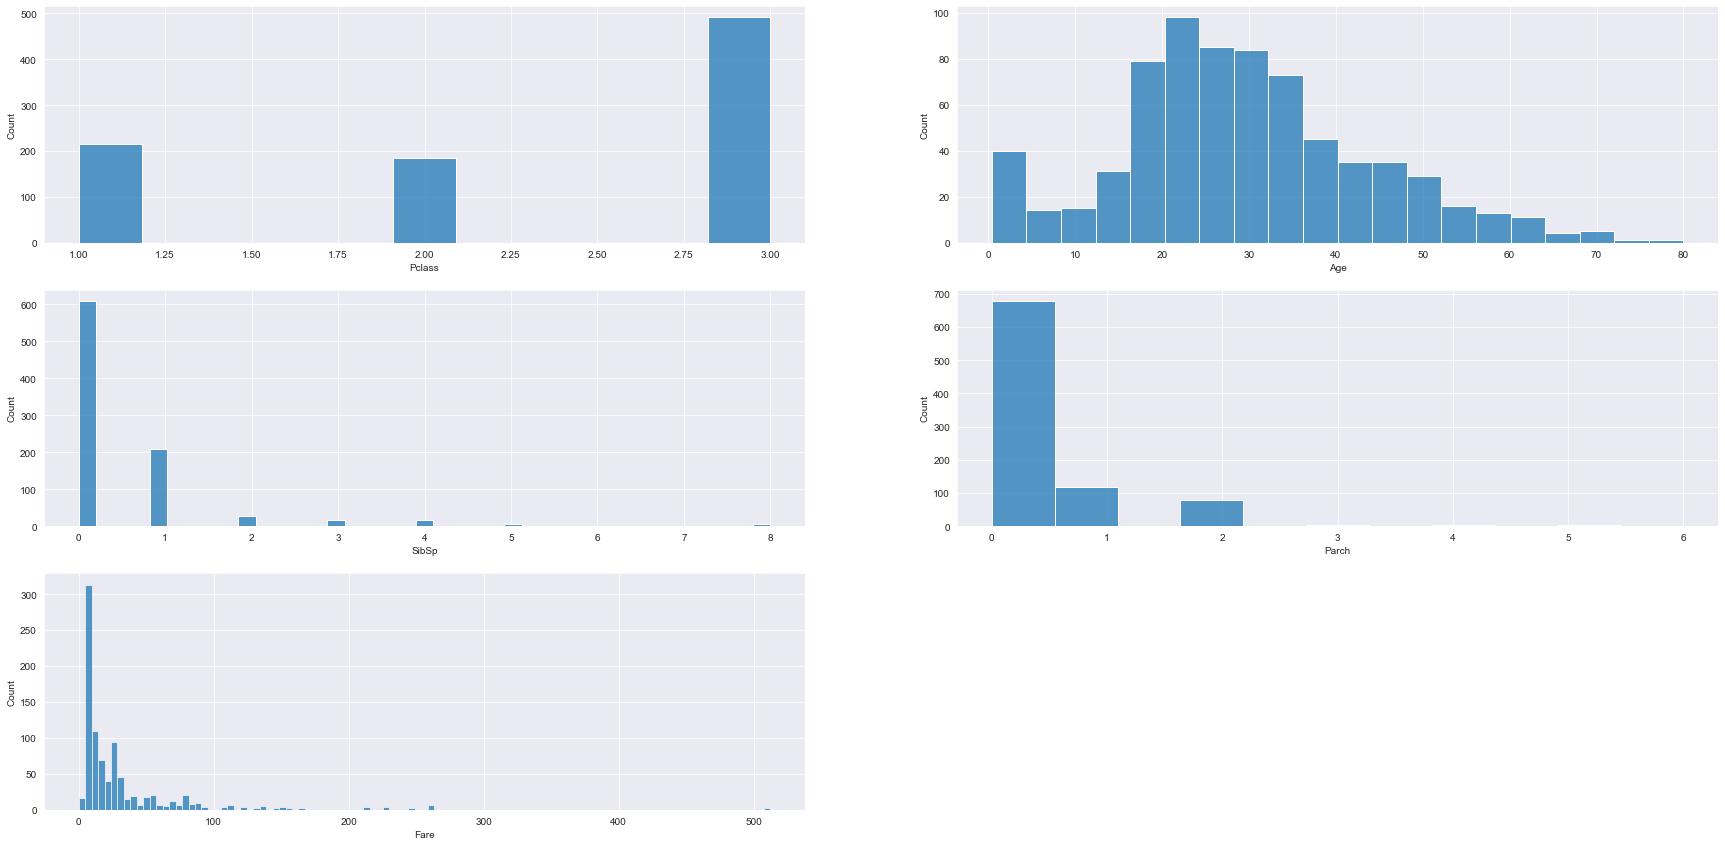

In [7]:
plt.figure (figsize = (30,20))
sns.set_style ('darkgrid')

i = 0

for feature in numeric_features:
    plt.subplot (4,2, i + 1 )
    i = i + 1
    sns.histplot (data = df_eda, x = df_eda[feature])

<h5> Analysis on Titanic Passengers: </h5>
<p> 
    <ul>
        <li>Titanic is dominated with people from lower socio-economic status</li>
        <li>The passengers ages are ranging from infant (below 1 years old) to elders (up to 80 years old). Most of titanic passengers are on their productive ages (on their 20s and 30s)</li>
        <li>Most of the passengers does not take their relatives on their voyage (low SibSp and Parch)</li>
        <li>The fare distribution is skewed to the lower values</li>
    </ul>
</p>

<h3>Chapter 2: Data Preprocessing</h3>
<p>This chapter preprocesses the data to get dataset that is ready for analysis. The preprocessing include:
<ul>
    <li>Drop unused columns or those that cannot be used on the statistics (e.g., all value is unique for every entry, the definition of the column is unclear, and the column values are empty)</li>
    <li>Convert data to 'ready-to-process' types, for example converting area values from string or object to integer</li>
</ul>
</p>

<h5>Data preprocessing procedure from Data Exploration:</h5>
<p> 
Since the download already split the train-test datasets, the preprocessing does not include the splitting procedure. Both datasets is transformed following this procedures:
    <ul>
        <li>Survived column in train dataset will be the target column</li>
        <li>Sex column will be encoded into numeric</li>
        <li>Cabin column need to be transformed to only show those with Cabin or not (boolean)</li>
        <li>Simplify SibSp and Parch columns into one column</li>
        <li>PassengerId, Name and Ticket columns will be droped as it deemed irrelevant to the model</li>
        <li>Fare column will be normalised due to high range of value</li>
        <li>Embarked column will be encoded into numeric</li>
    </ul>
After data transformation, remaining NaN values will be removed
</p>

In [8]:
# columns categorisation
col_numerical = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
col_categorical = ['Sex', 'Embarked']
col_drop = ['PassengerId', 'Name', 'Ticket']

col_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
col_target = ['Survived']

In [9]:
# transform data

scaler = preprocessing.StandardScaler()
le = preprocessing.LabelEncoder()

df_train = df_titanic_train.drop(col_drop, axis=1)

# encode categorical columns
for col in col_categorical:
    df_train[col] = le.fit_transform(df_train[col])

# transform Cabin to boolean value
df_train.loc[~df_train['Cabin'].isnull(),['Cabin']] = 1
df_train.loc[df_train['Cabin'].isnull(),['Cabin']] = 0

df_train['Cabin'] = df_train['Cabin'].astype(str).astype(int)

# simplify SibSp and Parch
df_train['Family'] = df_train['SibSp'] + df_train['Parch']

# scale Fare data
fare = df_train[['Fare']].to_numpy().reshape(-1,1)
df_train['Fare'] = scaler.fit_transform(fare)

df_train.dropna(inplace=True)

In [10]:
print('Train dataset')
df_train.info()

Train dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Cabin     714 non-null    int64  
 8   Embarked  714 non-null    int64  
 9   Family    714 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 61.4 KB


In [11]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0,3,1,22.0,1,0,-0.502445,0,2,1
1,1,1,0,38.0,1,0,0.786845,1,0,1
2,1,3,0,26.0,0,0,-0.488854,0,2,0
3,1,1,0,35.0,1,0,0.420730,1,2,1
4,0,3,1,35.0,0,0,-0.486337,0,2,0


In [12]:
# Assign train and test data

x = df_train[col_features].to_numpy()
y = df_train[col_target].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

<h3>Chapter 3: Defining, Training and Evaluate Model</h3>
<p>This chapter define and compile the model, incuding choosing the best hyperparameters for the model. This chapter will test several model available on scikit then determine the best models based on analysis.
</p>

<h5>Model 1 - Logistic Regression</h5>

In [13]:
model_regression = linear_model.LogisticRegression()
model_regression.fit(x_train,y_train)
y_predict = model_regression.predict(x_test)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


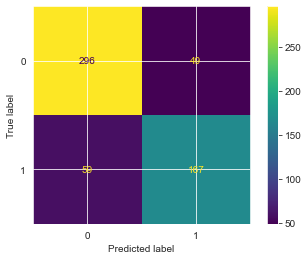

In [14]:
plot_confusion_matrix(model_regression, x_train, y_train)

<h5>Model 2 - K-Nearest Neighbors</h5>

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was 

Text(0, 0.5, 'Error mean')

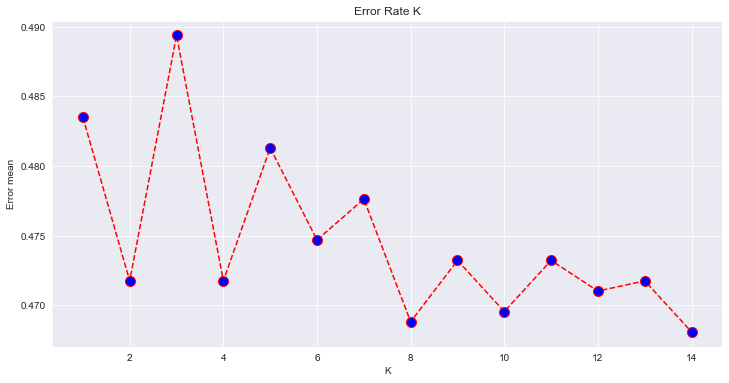

In [15]:
# Find best n_neighbors value

error = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,15), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

<h5> Analysis: </h5>
<p> Based on the Error Rate K figure, a K-value is decided at 10 for minimum error </p>

In [16]:
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(x_train, y_train)
y_predict = model_knn.predict(x_test)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


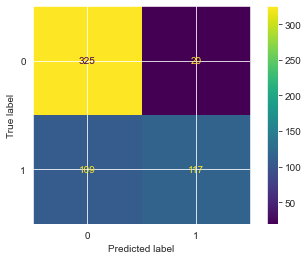

In [17]:
plot_confusion_matrix(model_knn, x_train, y_train)

<h5>Model 3 - Support Vector Machine</h5>

In [18]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(x_train, y_train)
y_predict = model_svm.predict(x_test)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


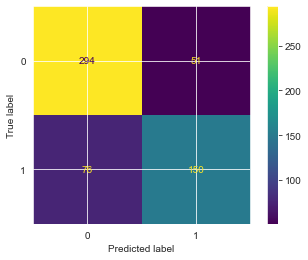

In [19]:
plot_confusion_matrix(model_svm, x_train, y_train)

<h5>Model 4 - Decision Tree</h5>

In [20]:
# Best hyperparameter search
max_depths = list(range(1,20))
criterion = ['gini', 'entropy']

param_grid = {'criterion': criterion,
              'max_depth': max_depths}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='accuracy')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [21]:
model_dct = DecisionTreeClassifier(max_depth=9, criterion='entropy')
model_dct.fit(x_train, y_train)
y_predict = model_dct.predict(x_test)

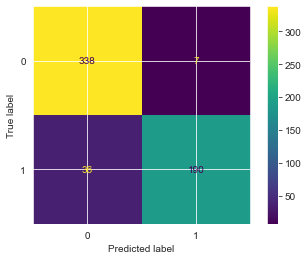

In [22]:
plot_confusion_matrix(model_dct, x_train, y_train)

<h5>Model 5 - Random Forest</h5>

In [23]:
# Assume best hyperparameter is similar to Decision Tree
model_rdf = RandomForestClassifier(max_depth=9, criterion='entropy')
model_rdf.fit(x_train, y_train)
y_predict = model_rdf.predict(x_test)

<ipython-input-23-e1f078fc00ef>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rdf.fit(x_train, y_train)


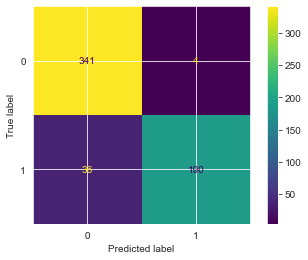

In [24]:
plot_confusion_matrix(model_rdf, x_train, y_train)

<h5>Model 6 - Naive Bayes</h5>

In [25]:
model_nbg = GaussianNB()
model_nbg.fit(x_train, y_train)
y_predict = model_nbg.predict(x_test)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


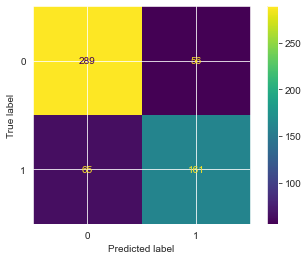

In [26]:
plot_confusion_matrix(model_nbg, x_train, y_train)

<h5>Best Model Decision</h5>
<p>The analysis of choosing the best model for the dataset</p>

In [27]:
# Score calculation
list_model = [
    model_regression,
    model_knn,
    model_svm,
    model_dct,
    model_rdf,
    model_nbg
]

result = []

for mod in list_model:
    a = mod.score(x_train, y_train)
    b = mod.score(x_test, y_test)
    
    result.append(
        {
            mod: {
                'score_train': a,
                'score_test': b
            }
        })
    
result

[{LogisticRegression(): {'score_train': 0.8108581436077058,
   'score_test': 0.7692307692307693}},
 {KNeighborsClassifier(n_neighbors=10): {'score_train': 0.7740805604203153,
   'score_test': 0.6783216783216783}},
 {SVC(kernel='linear'): {'score_train': 0.7775831873905429,
   'score_test': 0.7902097902097902}},
 {DecisionTreeClassifier(criterion='entropy', max_depth=9): {'score_train': 0.9246935201401051,
   'score_test': 0.7832167832167832}},
 {RandomForestClassifier(criterion='entropy', max_depth=9): {'score_train': 0.9299474605954466,
   'score_test': 0.8111888111888111}},
 {GaussianNB(): {'score_train': 0.7880910683012259,
   'score_test': 0.7342657342657343}}]

<h5> Analysis: </h5>
<p> Based on the model scoring, we will go with Random Forest Classifier with criterion = 'entropy' and max_depth = 9 </p>

<h3>Chapter 4: Model Deployment</h3>
<p>This chapter exports the package model to be deployed based on the analyses performed.
</p>

In [28]:
pickle.dump(model_rdf, open('model_deployment/model/model_classifier.pkl','wb'))